# Атласов Александр, БЭК193

In [26]:
import sys
import math
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform, expon, geom

# Урок №3

## №1

In [27]:
n = 10000

chi2.rvs(size = n, df = 5) 

t.rvs(size = n, df = 10)

norm.rvs(size = n, loc = 10, scale = 25);

## №2

In [28]:
np.random.seed(1)
n = 10000
x = chi2.rvs(size = n, df = 10);
print('E(X) =', np.mean(x), '\n')
print('E(X^3) =', np.mean(x ** 3), '\n')
print('Var(X) =', np.var(x), '\n')
print('Median(X) =', np.median(x), '\n')
print('P(X <= 1.7) =', np.mean(x <= 1.7), '\n')
print('Квантиль X уровня 0.3:', np.quantile(x, 0.3), '\n')
print('Var(sin(X)) =', np.mean(np.sin(x ** 2)) - (np.mean(np.sin(x)) ** 2))

E(X) = 9.991847035310839 

E(X^3) = 1681.5686233030494 

Var(X) = 20.11836459282261 

Median(X) = 9.332139835569352 

P(X <= 1.7) = 0.0016 

Квантиль X уровня 0.3: 7.236297907301479 

Var(sin(X)) = 0.0016211278317631059


## №3

In [4]:
np.random.seed(2)
n = 10000
y = chi2.rvs(size = n, df = 5) 
z = np.random.uniform(size = n, low = 1, high = 5)
print('E(X + Y) =', np.mean(y + z), '\n')
print('P(X - Y <= 2) =', np.mean((x - y) <= 2), '\n')
print('Var(X / Y) =', np.mean((y / z) ** 2) - np.mean(y / z) ** 2)

E(X + Y) = 8.015259121694386 

P(X - Y <= 2) = 0.2862 

Var(X / Y) = 2.8642481545585485


## №4

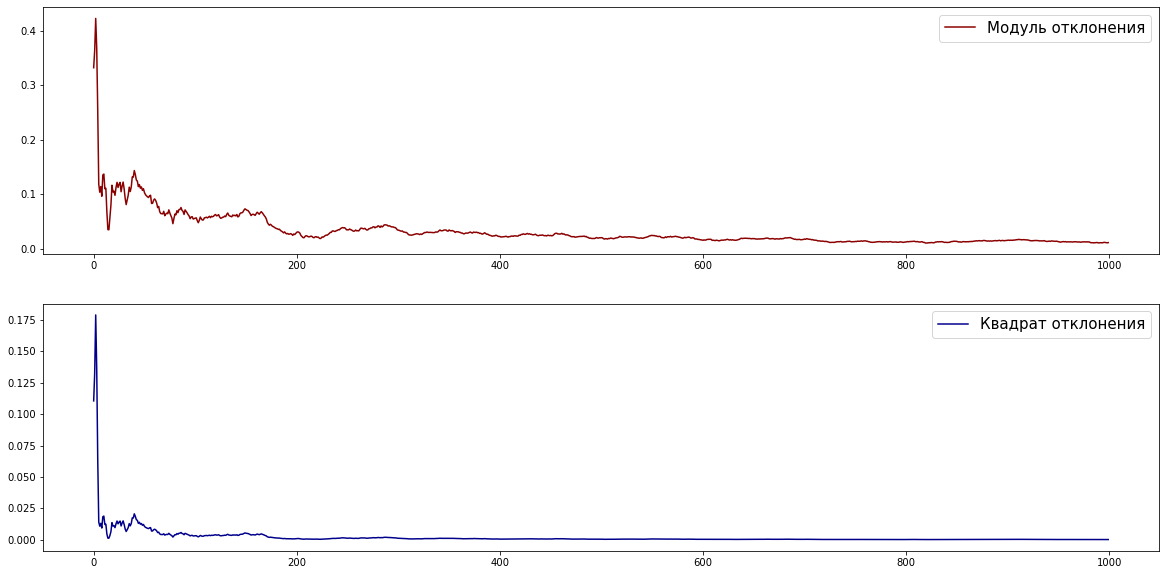

In [5]:
np.random.seed(7)
n = 100000
step = 100
f = chi2.rvs(size = n, df = 5)
b = np.random.uniform(size = n, low = 1, high = 5)
m = int(len(f) / step)                              
u_mean = np.zeros(m)                                    
                                                       
for i in range(0, m):
    u_mean[i] = np.mean(f[0:((i + 1) * step - 1)] + b[0:((i + 1) * step - 1)]) 
dev = abs(u_mean - 8)  

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)
ax1.plot(dev, color='darkred', label='Модуль отклонения')
ax1.legend(fontsize=15)
ax2.plot(dev ** 2, color='darkblue', label='Квадрат отклонения')
ax2.legend(fontsize=15)
fig.set_figwidth(20)
fig.set_figheight(10)

## №5

In [11]:
# Распределение Бернулли с параметром p = 0.3
x = []
for i in range(1, 100000):
    x.append(np.random.choice([1, 0], p=[0.3, 0.7]))

In [14]:
# Биномиальное распределение с параметрами n = 5, p = 0.3 (используйте встроенную квантильную функцию)
r = np.random.uniform(size = 1000, low = 0, high = 1)
binom_v = binom(n=5, p=0.3).ppf(r)

In [15]:
# Нормальное распределение с параметрами mu = 5, sigma = 25 (используйте встроенную квантильную функцию)
norm_v = norm(loc = 5, scale = 5).ppf(r)

In [16]:
# Экспоненциальное распределение с параметром lambda = 5
from scipy.stats import expon
exp_v = expon(5).ppf(r)

In [17]:
# Геометрическое распределение с вероятностью успеха 0.3
from scipy.stats import geom
geom_v = geom(0.3).ppf(r)

In [18]:
# Распределение Пуассона с математическим ожиданием 5
from scipy.stats import poisson
possion_v = poisson(5).ppf(r)

In [19]:
# Суммы распределений из предыдущих двух пунктов, предполагая независимость.
summ = geom(0.3).ppf(r) + poisson(5).ppf(r)

# Урок №4

## №1

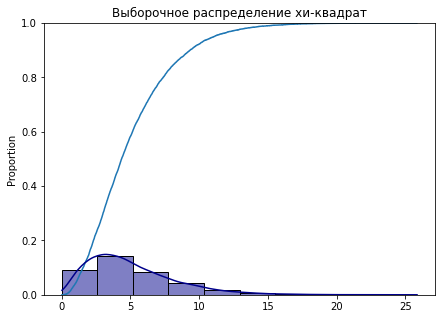

In [20]:
plt.figure(figsize=(7,5))
n = 10000
y = chi2.rvs(size = n, df = 5)
sns.ecdfplot(y);
sns.histplot(y, stat = 'density', bins=10, kde=True, color='darkblue')
plt.title('Выборочное распределение хи-квадрат');

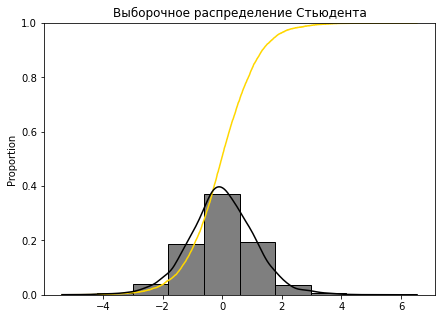

In [21]:
plt.figure(figsize=(7,5))
z = t.rvs(size = n, df = 10)
sns.ecdfplot(z, color='gold')
sns.histplot(z, stat = 'density', color='black', bins=10, kde=True)
plt.title('Выборочное распределение Стьюдента');

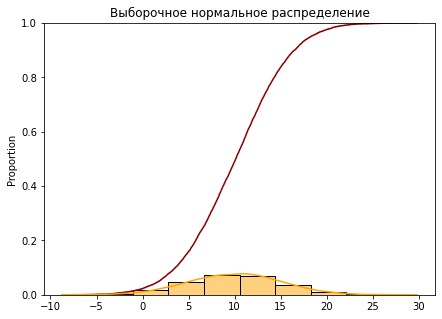

In [22]:
plt.figure(figsize=(7,5))
u = norm.rvs(size = n, loc = 10, scale = 5)
sns.ecdfplot(u, color='darkred')
sns.histplot(u, stat = 'density', color='orange', bins=10, kde=True)
plt.title('Выборочное нормальное распределение');

## №2 
Построим выборочные и истинные функции распределения и пронаблюдаем, как размер выборки влияет на точность результатов

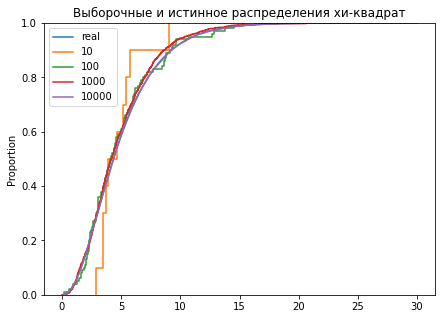

In [23]:
plt.figure(figsize=(7,5))
k = np.arange(0, 30, 0.001)
m = chi2.cdf(k, df = 5)
y10 = chi2.rvs(size = 10, df = 5)
y100 = chi2.rvs(size = 100, df = 5)
y1000 = chi2.rvs(size = 1000, df = 5)
y10000 = chi2.rvs(size = 10000, df = 5)
plt.plot(k, m, label='real')
sns.ecdfplot(y10, label='10');
sns.ecdfplot(y100, label='100');
sns.ecdfplot(y1000, label='1000');
sns.ecdfplot(y10000, label='10000');
plt.legend(loc='upper left');
plt.title('Выборочные и истинное распределения хи-квадрат');

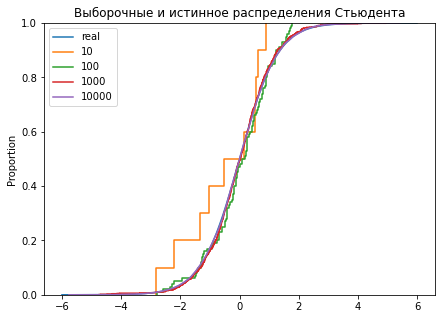

In [24]:
plt.figure(figsize=(7,5))
k1 = np.arange(-6, 6, 0.001)
m1 = t.cdf(k1, df = 10)
z10 = t.rvs(size = 10, df = 10)
z100 = t.rvs(size = 100, df = 10)
z1000 = t.rvs(size = 1000, df = 10)
z10000 = t.rvs(size = 10000, df = 10)
plt.plot(k1, m1, label='real')
sns.ecdfplot(z10, label='10')
sns.ecdfplot(z100, label='100')
sns.ecdfplot(z1000, label='1000')
sns.ecdfplot(z10000, label='10000')
plt.legend(loc='upper left')
plt.title('Выборочные и истинное распределения Стьюдента');

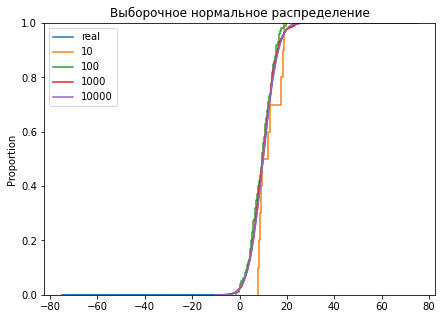

In [25]:
plt.figure(figsize=(7,5))
k2 = np.arange(-75, 75, 0.001)
m2 = norm.cdf(k2, loc = 10, scale = 5)
u10 = norm.rvs(size = 10, loc = 10, scale = 5)
u100 = norm.rvs(size = 100, loc = 10, scale = 5)
u1000 = norm.rvs(size = 1000, loc = 10, scale = 5)
u10000 = norm.rvs(size = 10000, loc = 10, scale = 5)
plt.plot(k2, m2, label='real')
sns.ecdfplot(u10, label='10')
sns.ecdfplot(u100, label='100')
sns.ecdfplot(u1000, label='1000')
sns.ecdfplot(u10000, label='10000')
plt.legend(loc='upper left')
plt.title('Выборочное нормальное распределение');

## №3

In [85]:
def eecdf(a: int, x: np.array) -> float:
    return np.mean(x <= a)

In [99]:
from typing import List
def eeecdf(v: List, x: np.array) -> np.array:
    v = list(map(lambda y: np.mean(x <= y), v))
    return v

## №4

In [ ]:
def gisst(t: int, x: np.array):
    t_adj = t - min(x)                                      
    x_adj = x - min(x)                                     
    bin_n = 10                                            
    bin_w = (max(x) - min(x)) / bin_n                       
    t_w_ratio = (t_adj) / bin_w                             
    bin_t = math.floor(t_w_ratio) + 1                       
    return len(x[(x_adj >= ((bin_t - 1) * bin_w)) & (x_adj < (bin_t * bin_w))]) / (n * bin_w) 

## №5

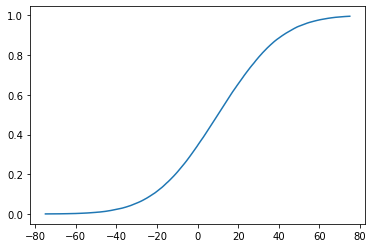

In [347]:
def ploot(a: np.array, x: np.array):
    p = []
    for i in a:
        p.append(np.mean(x <= i))
    return p
# Пример
c = np.arange(-75, 75, 0.01)
b = norm.rvs(size = 100000, loc = 10, scale = 25)
plt.plot(c, ploot(c, b));

## №6

In [274]:
x1 = chi2.rvs(size = 10000, df=5)
x2 = chi2.rvs(size = 10000, df=5)
x3 = chi2.rvs(size = 10000, df=5)
x4 = chi2.rvs(size = 10000, df=5)
x5 = chi2.rvs(size = 10000, df=5)
z = np.array([np.mean(x1 <= 5), np.mean(x2 <= 5), np.mean(x3 <= 5), np.mean(x4 <= 5), np.mean(x5 <= 5)])
print('E(X) =', np.mean(z))
print('D(X) =', np.var(z))

E(X) = 0.5861599999999999
D(X) = 5.842399999999867e-06


# Урок №5

## №1

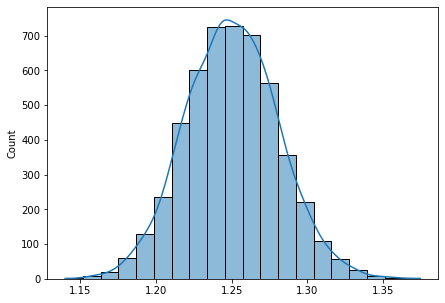

In [289]:
# Второй начальный момент
x_mean = np.empty(5000)                                   
for i in range(0, 5000):
    x_new = t.rvs(size = 5000, df = 10)
    x_mean[i] = np.mean(x_new ** 2)
x_mean = np.sort(x_mean)
plt.figure(figsize=(7, 5))
sns.histplot(x_mean, kde=True, bins=20)
plt.show();

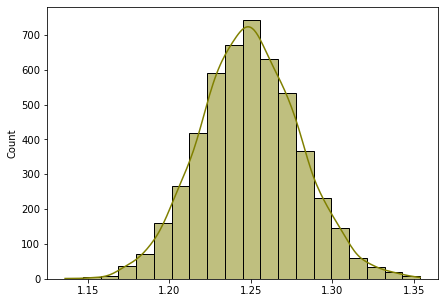

In [290]:
# Выборочная дисперсия
x_var = np.empty(5000)                                   
for i in range(0, 5000):
    x_new = t.rvs(size = 5000, df = 10)
    x_var[i] = np.var(x_new)
x_var = np.sort(x_var)
plt.figure(figsize=(7, 5))
sns.histplot(x_var, kde=True, bins=20, color='olive')
plt.show();

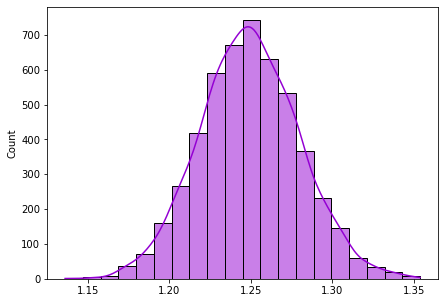

In [292]:
# Выборочная медиана
x_med = np.empty(5000)                                   
for i in range(0, 5000):
    x_new = t.rvs(size = 5000, df = 10)
    x_med[i] = np.median(x_med)
x_med = np.sort(x_var)
plt.figure(figsize=(7, 5))
sns.histplot(x_med, kde=True, bins=20, color='darkviolet')
plt.show();

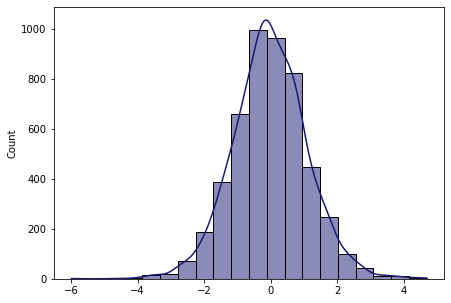

In [293]:
# Третий элемент выборочной статистики
x_3 = np.empty(5000)                                   
for i in range(0, 5000):
    x_new = t.rvs(size = 5000, df = 10)
    x_3[i] = x_new[3]
x_3 = np.sort(x_3)
plt.figure(figsize=(7, 5))
sns.histplot(x_3, kde=True, bins=20, color='midnightblue')
plt.show();

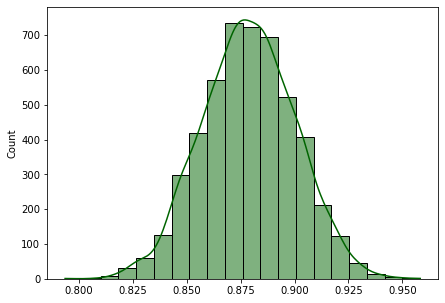

In [294]:
# Выборочный квантиль уровня 0.8
x_q = np.empty(5000)                                   
for i in range(0, 5000):
    x_new = t.rvs(size = 5000, df = 10)
    x_q[i] = np.quantile(x_new, 0.8)
x_q = np.sort(x_q)
plt.figure(figsize=(7, 5))
sns.histplot(x_q, kde=True, bins=20, color='darkgreen')
plt.show();

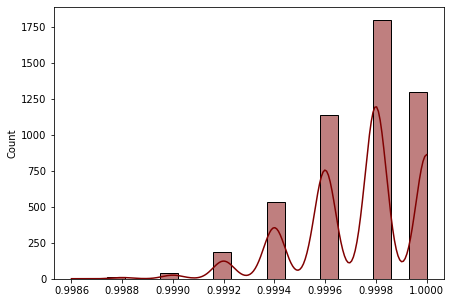

In [295]:
# Выборочная функция распределения в точке 5
x_5 = np.empty(5000)                                   
for i in range(0, 5000):
    x_new = t.rvs(size = 5000, df = 10)
    x_5[i] = np.mean(x_new <= 5)
x_5 = np.sort(x_5)
plt.figure(figsize=(7, 5))
sns.histplot(x_5, kde=True, bins=20, color='maroon')
plt.show();

## №3

In [320]:
x1 = np.random.uniform(size=5000, low=0, high=1)
x2 = np.random.uniform(size=5000, low=0, high=1)
x3 = np.random.uniform(size=5000, low=0, high=1)
y1 = x1 + x2
y2 = x2 + x3
print('cov(y1, y2) =', np.cov(y1, y2), '\n')
print('corr(y1, y2) =', np.corrcoef(y1, y2))

cov(y1, y2) = [[0.17057019 0.08611552]
 [0.08611552 0.16844716]] 

corr(y1, y2) = [[1.         0.50804012]
 [0.50804012 1.        ]]


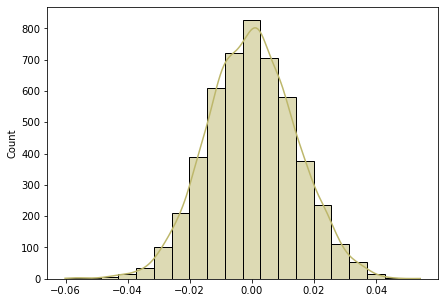

In [322]:
x_c = np.empty(5000)                                   
for i in range(0, 5000):
    x1_new = np.random.uniform(size=5000, low=0, high=1)
    x2_new = np.random.uniform(size=5000, low=0, high=1)
    x_c[i] = np.corrcoef(x1_new, x2_new)[0][1]
x_c = np.sort(x_c)
plt.figure(figsize=(7, 5))
sns.histplot(x_c, kde=True, bins=20, color='darkkhaki')
plt.show();

## №4

In [325]:
def v_mean(x: np.array) -> float:
    return x.sum() / len(x)

In [326]:
def v_var(x: np.array) -> float:
    return (x ** 2).sum() / len(x) - (x.sum() / len(x)) ** 2

In [329]:
def v_med(x: np.array) -> float:
    return np.quantile(np.sort(x), 0.5)

In [ ]:
def v_stat(i: int, x: np.array):
    return x[i]

In [330]:
def v_cov(x1: np.array, x2: np.array):
    return np.cov(x1, x2)

## №5

In [344]:
y1 = norm.rvs(size=10000, loc=0, scale=1)
y2 = norm.rvs(size=10000, loc=0, scale=1)
y3 = chi2.rvs(size=10000, df=2)
z1 = y1 ** 2 + y2 ** 2

In [345]:
print('Модуль разности мат ожиданий:', abs(np.mean(z1) - np.mean(y3)), '\n')
print('Модуль разности дисперий:', abs(np.var(z1) - np.var(y3)), '\n')
print('Модуль разности квантилей уровня 0.5:', abs(np.quantile(z1, 0.5) - np.quantile(y3, 0.5)))

Модуль разности мат ожиданий: 0.009828210687846894 

Модуль разности дисперий: 0.04266673032929713 

Модуль разности квантилей уровня 0.5: 0.002605748456908197


Выборочные характеристики достаточно близки, так как, по определению, хи-квадрат представляет собой сумму квадратов случайных величин, имеющих стандартное нормальное распределение.